# Random matrices: homework 1 due September 11, 2019


# Goal -- set up a Julia laboratory for many experiments to come

# For this pset we really just want you to execute

# (see piazza for those wanting to do all math theory)

(a video of how to do this homework will be setup this weekend)

Submit this notebook via Gradescope; instructions to follow.

#### Exercise 1 (Set-up)

(1.)  Follow the detailed instructions [here](https://github.com/mitmath/julia-mit) to:

  - Download the current stable version (1.2) of Julia for your machine from [here](https://julialang.org/downloads) and install it. 

  - Run the Julia executable.    
    
  - Install the IJulia package that provides an interface to the Jupyter notebook.
    
  - Run IJulia by typing `using IJulia; notebook()` at the Julia prompt.
    
(2a.) (If you know about github or want to learn go to 2b).  You can download the hw easily
from [here](https://nbviewer.jupyter.org/github/mitmath/18338/blob/master/HW/Random%20matrices%20HW1.ipynb) by
right clicking on the icon on the upper right and do "save link as" or equivalent.

(2b.) Alternatively -- -Clone a copy of this repository to your machine using `git clone https://github.com/mitmath/18338.git` from a terminal, or alternatively using a visual git client like GitKraken. 

 


(3.) Open the homework 1 notebook. Make a copy of the notebook using `File->Make a copy` from the `File` menu. Change the name of the copy to add your name as in HW1.alan_edelman.ipynb

(4) Figure out how to enter 1+1 in a cell in Jupyter and get 2 with SHIFT + ENTER.  Stay tuned: a video may come soon.



#### Exercise 2 (Distributions with examples of how to draw nice pictures with Julia)

(1). Follow the instructions [here](https://juliastats.github.io/Distributions.jl/stable/starting/) to create a standard normal distribution object and draw 1000 samples from it using the `Distributions.jl` package.




In [ ]:
]add Distributions 

In [ ]:
using Random, Distributions
d = Normal()
x = rand(d,5) # change 5 to 1000

(2). Use the `histogram` command from the `Plots.jl` package to draw a histogram of the result, using the `normalize=true` keyword argument to normalize the result to area 1.
You can fix the number of histogram bins with the `bins=` keyword argument.

<br>
Warning: plots takes forever the first time it compiles 


In [ ]:
]add Plots  

In [ ]:
using Plots

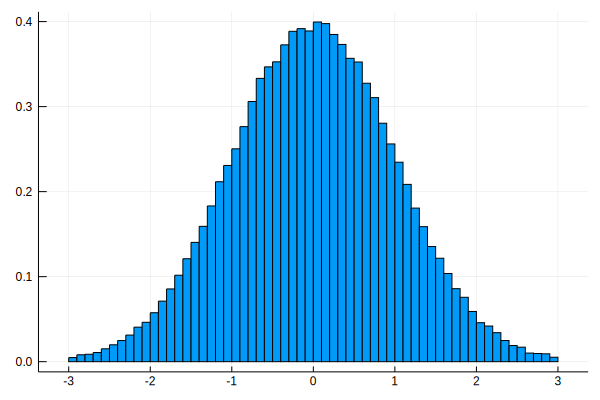

In [3]:
# draw a histogram plot, which requires the keyword argument "bins" if you wish to specify the bins
r = rand(d,10^5)
Plots.histogram(r, normalize = true, bins = -3:.1:3, legend = false)

In [ ]:
]add StatsBase

In [6]:
using StatsBase

In [7]:
h = fit(Histogram, r,  -3:.1:3) # create a histogram object with counts

Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [48, 81, 87, 107, 151, 198, 248, 312, 405, 462  …  457, 418, 340, 248, 189, 170, 101, 96, 92, 52]
closed: left
isdensity: false

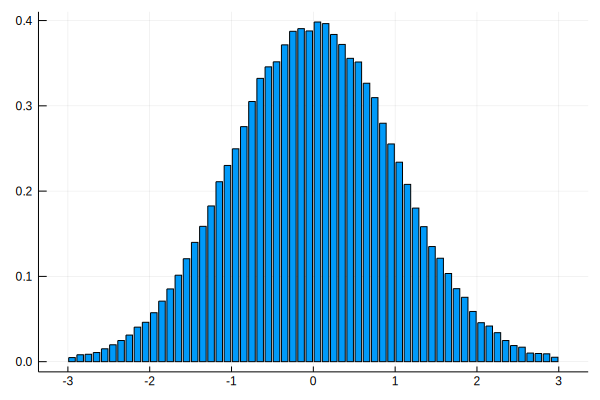

In [8]:
Plots.bar(h.edges,h.weights/Float64(h.edges[1].step)/length(r), legend=false) # normalize to have area = 1

In [9]:
#  Have Julia normalize for you
h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)

Histogram{Float64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  -3.0:0.1:3.0
weights: [0.0048145882022528255, 0.008124617591301644, 0.008726441116583246, 0.01073251953418859, 0.015145892052920348, 0.019860176334292906, 0.024875372378306265, 0.031294823314643366, 0.040623087956508215, 0.046340411446683445  …  0.04583889184228211, 0.04192703892795169, 0.034103333099290846, 0.024875372378306265, 0.0189574410463705, 0.017051666549645423, 0.010130696008906988, 0.009629176404505651, 0.009227960720984583, 0.005215803885773894]
closed: left
isdensity: true

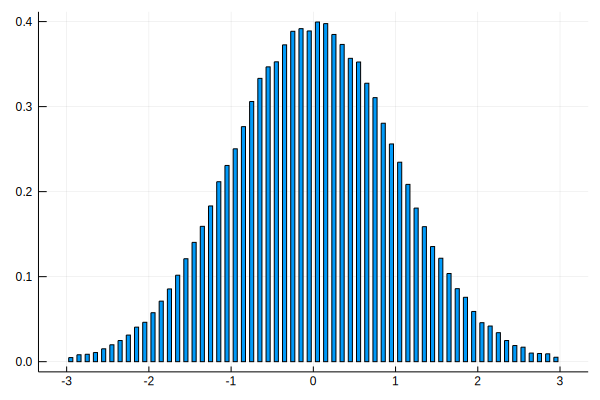

In [10]:
Plots.bar(h.edges, h.weights, legend=false, bar_width = .05) # or even a bar chart which has spaces betwen the bars

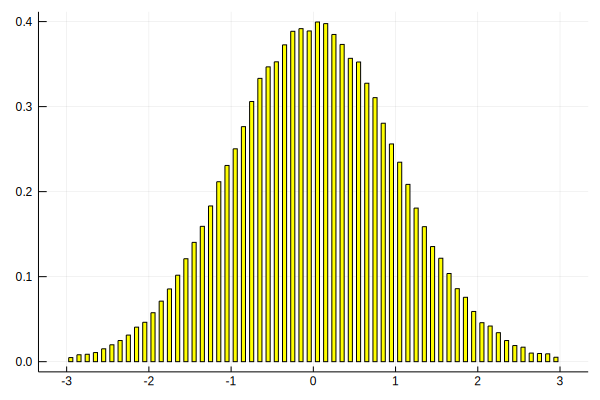

In [11]:
Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)  # make the color yellow

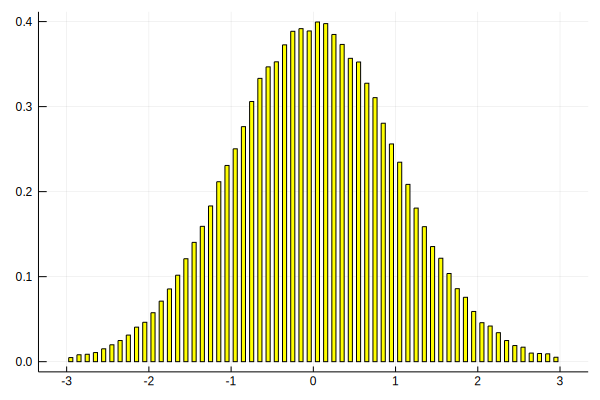

In [12]:
Plots.bar(h.edges,h.weights, fillcolor = RGB(1,1,0), bar_width = .05, legend=false) # your own r,g,b value

(3.) Use the `plot!` command to draw the exact PDF of the distribution on top.


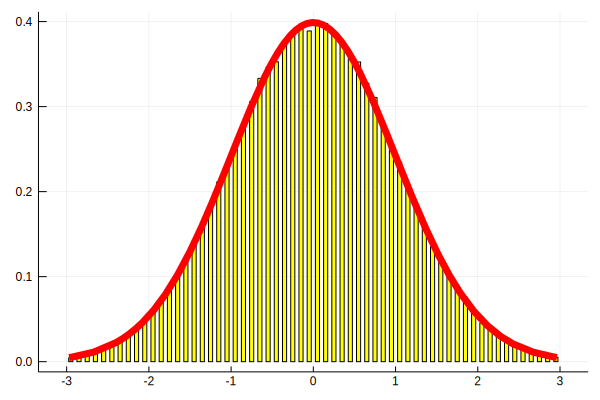

In [13]:
plot!( x-> exp(-x^2/2)/√(2π),-3,3, color=:red, lw=7)

(4.) Use the function `pdf` from the `Distributions.jl` package to do the same, without needing to explicitly type the formula for the PDF.

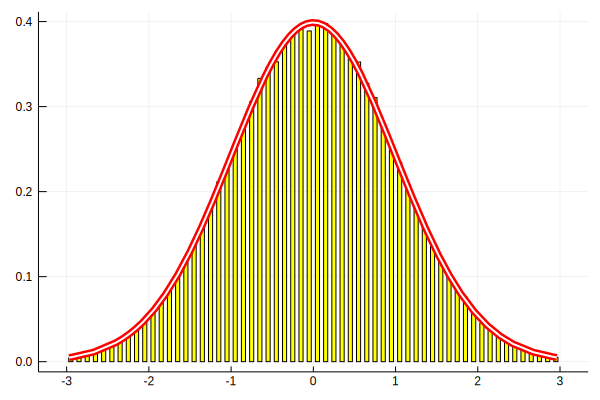

In [14]:
plot!( x->pdf(d,x), -3,3, color=:white, lw=2)

(5.) Use the `@manipulate` command from the `Interact.jl` package to interactively change the number of samples used for the histogram.  (unfortunately @manipulate may be flaky, don't sweat it)

In [15]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-9665642414242684298\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13434934073204021338\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-9665642414242684298\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [16]:
@manipulate for i= 1:5
    i
end

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 5,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e5b4910, Task (runnable) @0x000000012e5b4910), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4909432066671944080\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"4909432066671944080\",\"id\":\

In [17]:
@manipulate for n = 10 .^ [1,2,3,4,5,6]
    r = rand(Normal(),n)
    h = StatsBase.normalize( fit(Histogram, r,  -3:.1:3) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), -3,3, color=:red, lw=2, ylim=(0,.5))
end
 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 6,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010f1e9f90, Task (runnable) @0x000000010f1e9f90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"100\",\"1000\",\"10000\",\"100000\",\"1000000\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12252223978173418851\",\"id\":\"ob_11\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"1225

(6.) Repeat the above steps for the chi distribution with "2.8 degrees of freedom". How could you generalize this for any distribution?

In [18]:
@manipulate for n = 10 .^ [1,2,3,4,5,6]
    d = Chi(2.8)
    r = rand(d,n)
    h = StatsBase.normalize( fit(Histogram, r,  0:.1:4) , mode = :pdf)
    Plots.bar(h.edges,h.weights, fillcolor = :yellow, bar_width = .05, legend=false)
    plot!( x->pdf(d,x), 0,4, color=:red, lw=2, ylim=(0,.8))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 6,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
3, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/edelman/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/edelman/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/edelman/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012e5cf610, Task (runnable) @0x000000012e5cf610), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"10\",\"100\",\"1000\",\"10000\",\"100000\",\"1000000\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"1155808782190160974\",\"id\":\"ob_20\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"11558

#### Exercise 3 (Eigenvalues of symmetric random matrices; the semicircle law)

(1.) Generate a random gaussian matrix of size $n \times n$.  

In [19]:
using LinearAlgebra

In [21]:
n = 1000
A = rand(Normal(),n,n);

(2.) Symmetrize the matrix using the transpose operator `'`  (apostrophe) and `+` , and then create a version of type `Symmetric`.

In [24]:
A = Symmetric((A+A')/2);

(3.) Use `eigvals` from the `LinearAlgebra` standard library to calculate the eigenvalues of the matrix.  (NB: Standard libraries do *not* need to be installed; they come together with the Julia installation.)

In [25]:
n = 2000
A = rand(Normal(),n,n)
A = Symmetric(A+A')
λ = eigvals(A)/√(2n);

(4.) Histogram the eigenvalues to see the semicircle law. 

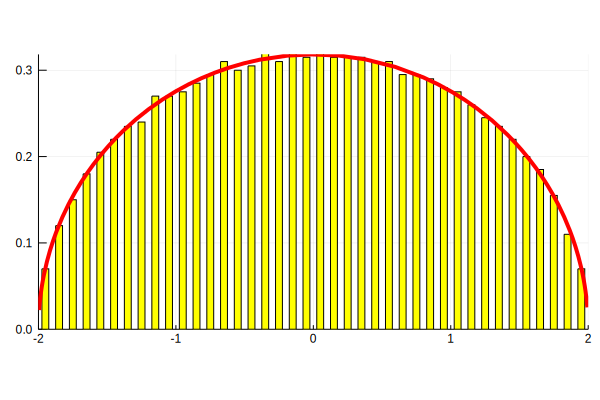

In [26]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.05, legend = false)

plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(5.) Use e.g. `append!` to combine the results from many runs into a single data vecxtor. Histogram the data you have collected, and compare it to the exact result (semicircle law).


In [27]:
 GOE(n) = (A = rand(Normal(),n,n); Symmetric(A+A'))
 
 t = 3000
 n = 50
 λ = Float64[]
 for i=1:t
     append!(λ, eigvals(GOE(n)))
 end
 λ ./= √(2n);

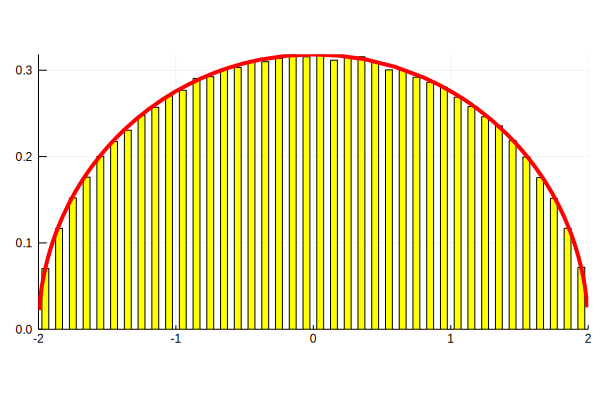

In [28]:
Plots.histogram(λ, normalize = true, color=:yellow, bins = -3:.1:3,  bar_width=.05, legend = false)
plot!(x->sqrt(4-x^2)/2π, -2,2, color=:red, lw=4, xlim=(-2,2), ylim=(0,1/π), aspect_ratio=2π)

(6.) Make an interactive visualization in which you can vary the number of trials and size of matrices. Comment on the results

#### Exercise 4 (Singular values)

1. Follow a similar approach as in exercise 3 to visualize the Marčenko-Pastur law on singular values of a rectangular matrix, using the `svdvals` function.

In [137]:
t = 3000
m,n = 100,50
σ = Float64[]
for i=1:t
  append!(σ, svdvals(rand(Normal(),m,n)))
end
σ ./= √m
r = n/m  # choose m ≥ n
a = (1-√r)
b = (1+√r)

1.7071067811865475

In [138]:
r # should be ≤ 1

0.5

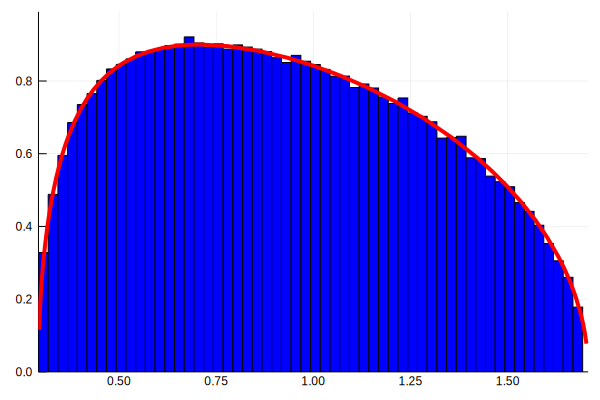

In [139]:
Plots.histogram(σ, normalize = true, color=:blue, bins = a:.025:b,  bar_width=.025, legend = false)
plot!(x->sqrt( (x^2-a^2)*(b^2-x^2))/(π*x*r), a,b, color=:red, lw=4, xlim=(a,b), ylim=(0,1.1*(b-a)/(r*π)))

#### Exercise 5 (Generalized singular values)


1. Follow a similar approach as in exercise 3 to visualize the Wachter law on the generalized singular values of a matrix, using the `svdvals(A, B)` method.

#### (Optional)  Exercise 6 (Parallel computing) 

In this exercise we will parallelize a random matrix calculation in a simple way.


(1.) Install the `DistributedArrays.jl` package. 


(2.) Load the `Distributed.jl` stdlib package. Use the `addprocs` function to add 2 processes (assuming that you have a multicore machine).


(3.) Create a `DArray` ("distributed array") `d`, e.g. using the array comprehension syntax `d = @DArray [i for i in 1:2]`.


(4.) Define a function `f` that will run the simulation from exercise 3 and returns a data vector of data.  *Broadcast* this function over the `d` using the syntax `f.(d)`.
This should return a new `DArray`.


(5.) Broadcast `fit(Histogram, v)` from the `StatsBase` package over this result. This should give another `DArray`; call it `hists`.


(6.) Use the `reduce(merge, hists)` function to combine the two histograms into one.


(7.) Compare the total time taken for this parallel version to a serial version.